Loading formatted geocoded file...


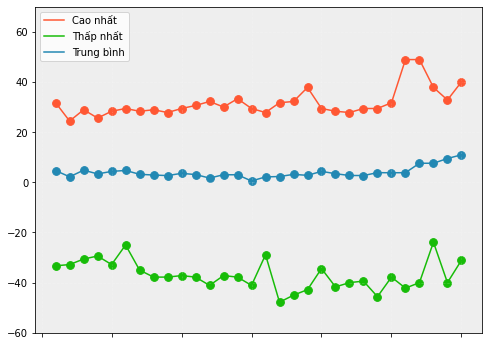

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import mpld3
from mpld3 import plugins

import reverse_geocoder as rg

result = pd.read_csv('output/part-00000-2','r',
        header=None, delimiter='\t',
        names=['year','max_temp', 'min_temp', 'avg_temp', 'max_lat', 'max_lon', 'min_lat', 'min_lon'])

max_geocodes = [(int(result['max_lat'][i])/1000, int(result['max_lon'][i])/1000) for i in range(len(result))] 
min_geocodes = [(int(result['min_lat'][i])/1000, int(result['min_lon'][i])/1000) for i in range(len(result))] 

# Look up location given geocode
def Geocode2Location(coordinates):
    location = rg.search(coordinates)
    return location

max_venues = [Geocode2Location(max_geocodes[i])[0] for i in range(len(result))]
max_labels = [max_venues[i]['name'] + ',' \
                 + max_venues[i]['cc'] + ',' + str(result['year'].values[i]) + ' (' \
                 + str(result['max_temp'].values[i]/10) + ')' for i in range(len(result))]

min_venues = [Geocode2Location(min_geocodes[i])[0] for i in range(len(result))]
min_labels = [min_venues[i]['name'] + ',' \
                 + min_venues[i]['cc'] + ',' + str(result['year'].values[i]) + ' (' \
                 + str(result['min_temp'].values[i]/10) + ')' for i in range(len(result))]

# plot
fig, ax = plt.subplots(subplot_kw=dict(facecolor='#EEEEEE'), figsize=(8,6))

scatter1_max = ax.scatter(result['year'], 
                     result['max_temp'] /10,
                     cmap=plt.cm.jet,s=60, color='#FF5733')
scatter2_min = ax.scatter(result['year'], 
                     result['min_temp'] /10,
                     cmap=plt.cm.jet, s=60, color='#17BC08'
                     )
scatter3_avg = ax.scatter(result['year'], 
                     result['avg_temp'] /100,
                     cmap=plt.cm.jet, s=60, color='#2288B3'
                     )

ax.grid(color='white', linestyle='--', alpha=0.2)
plt.plot(result['year'], result['max_temp'] /10,  color='#FF5733', label='Cao nhất')
plt.plot(result['year'], result['min_temp'] /10,  color='#17BC08', label='Thấp nhất',)
plt.plot(result['year'], result['avg_temp'] /100, color='#2288B3', label='Trung bình')

plt.legend(loc='upper left')
plt.ylim(-60,70)
ax.xaxis.set_major_formatter('')

max_temp_tooltips = mpld3.plugins.PointLabelTooltip(scatter1_max, labels=max_labels)
min_temp_tooltips = mpld3.plugins.PointLabelTooltip(scatter2_min, labels=min_labels)

mpld3.enable_notebook()
#mpld3.plugins.connect(fig, max_temp_tooltips)
#mpld3.plugins.connect(fig, min_temp_tooltips)

# Run this script locally to see the result
#mpld3.display()
fig.plugins = [plugins.PointLabelTooltip(scatter1_max, max_labels)]
